In [1]:
dat = read.csv('../data/AVM_day0_spectra.csv', sep='\t')

In [2]:
ppm = rev(as.numeric(dat[['X']]))
spectra = t(as.matrix(dat[c(2:17)]))
spectra = spectra[, ncol(spectra):1]

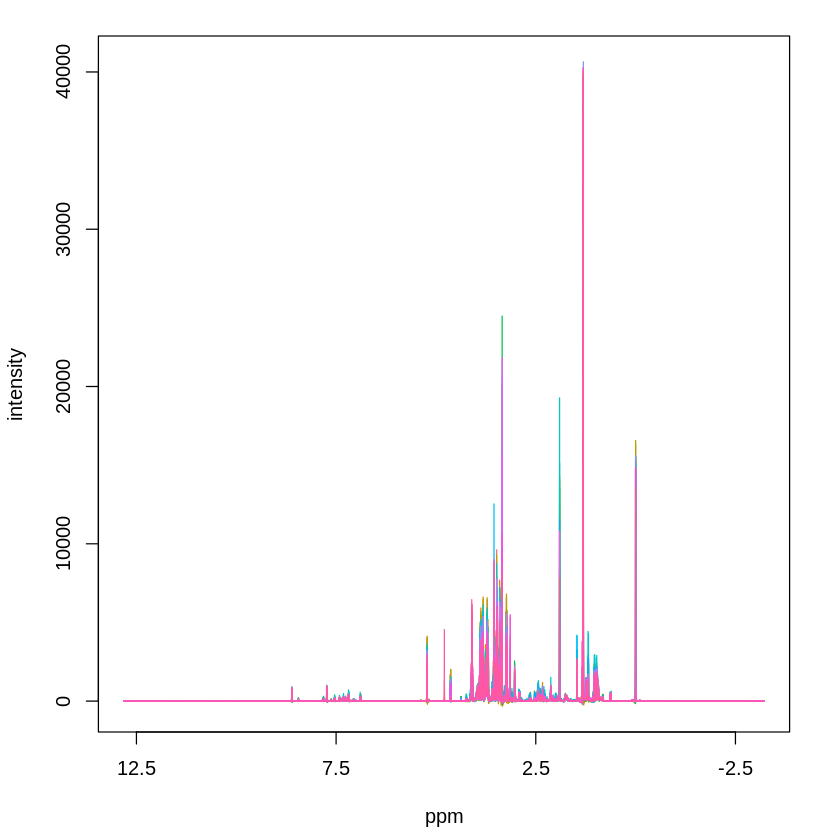

In [3]:
library(speaq)
speaq::drawSpecPPM(Y.spec = spectra, 
                   X.ppm = ppm)
#                    title = 'Wine data spectra', 
#                    groupFactor = wine.color, 
#                    legend.extra.x = 1, 
#                    legend.extra.y = 1.1)

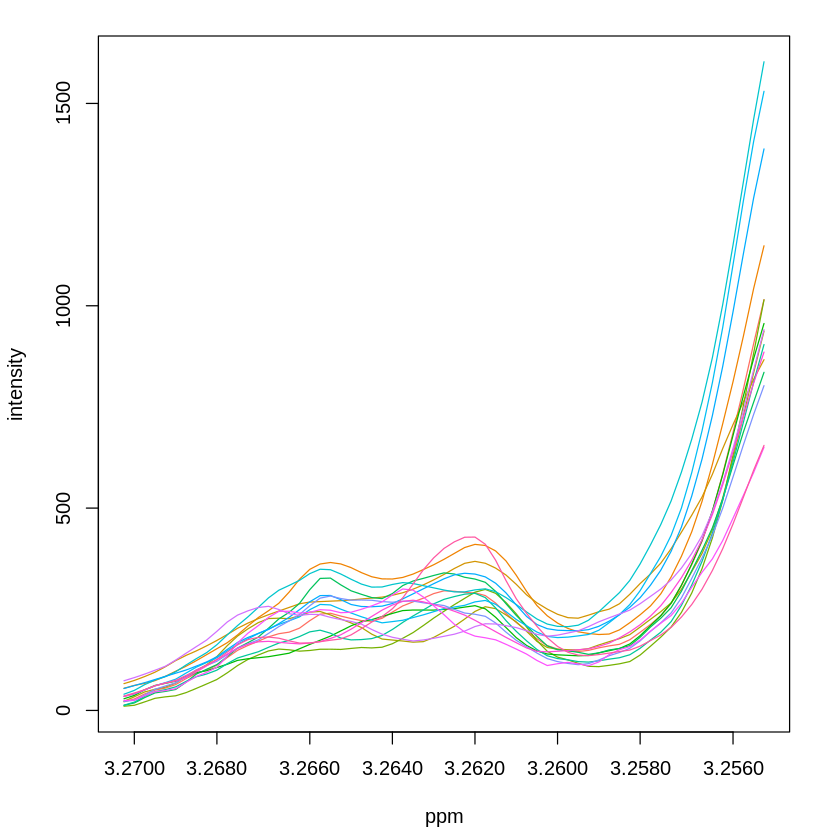

In [18]:
# small excerpt by defining the region of interest
speaq::drawSpecPPM(Y.spec = spectra, 
                   X.ppm = ppm, 
                   legend.extra.x = 1.05, 
                   legend.extra.y = 1.0,
                   ROI.ppm = 3.26278, 
                   ROI = NULL, 
                   roiWidth.ppm = 0.0075,
                   legendpos = "topright" )

In [10]:
peaks <- speaq::getWaveletPeaks(Y.spec=spectra, 
                                     X.ppm=ppm,
                                     window.split=4,
                                     baselineThresh = 10,
                                     SNR.Th = -1, 
                                     nCPU = -1,
                                     include_nearbyPeaks = TRUE)

[1] "detecting peaks"
  |======================================================================| 100%
[1] "fixing duplicate detections"
  |======================================================================| 100%


In [11]:
grouped <- speaq::PeakGrouper(Y.peaks = peaks,
                                   min.samp.grp = 5,
                                   grouping.window.width = 10)

[1] "regrouping peaks"
  |======================================================================| 100%
[1] "verifying regroupment"
  |======================================================================| 100%


In [12]:
head(grouped[grouped$peakPPM < 7.75 & grouped$peakPPM > 7.70,])

,peakIndex,peakPPM,peakValue,peakSNR,peakScale,Sample
262,20758,7.73546,1388.368,21.08227,11,1
263,20758,7.73522,1501.689,29.81069,11,2
264,20758,7.73571,1420.331,39.83850,12,3
265,20758,7.73498,1375.535,23.74021,11,5
266,20758,7.73595,1411.756,35.14007,11,6
267,20758,7.73571,1429.355,24.67499,11,7


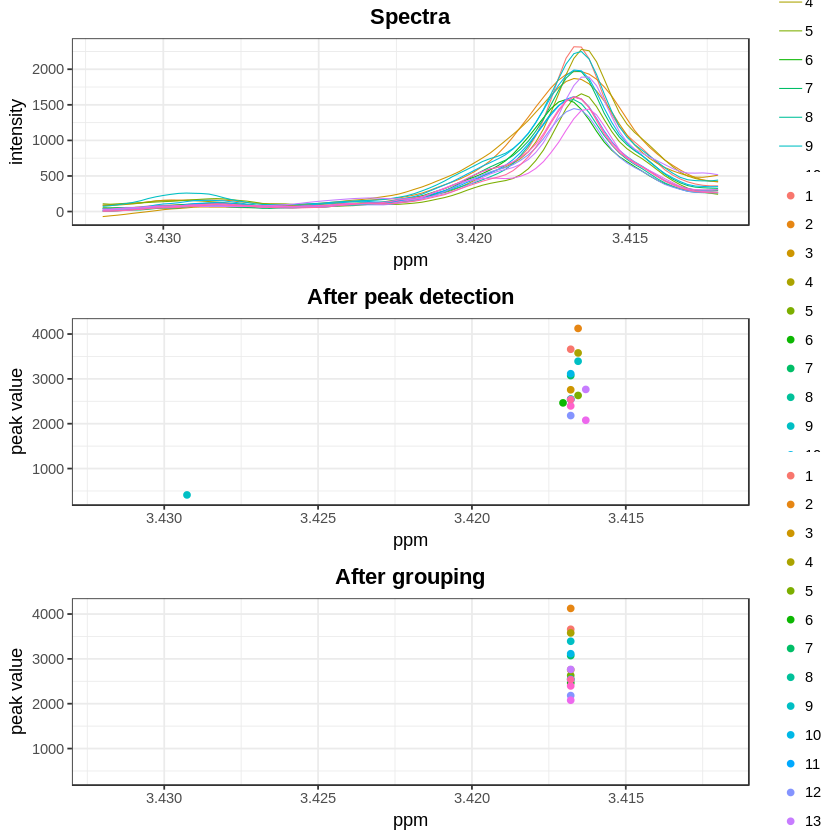

In [38]:
# adding labels to the dat a for plotting and the group ppm values
library(ggplot2)
ROI.ppm <- 3.422
roiWidth.ppm <- 0.01

speaq::ROIplot(Y.spec = spectra, 
               X.ppm = ppm, 
               ungrouped.peaks = peaks,
               grouped.peaks = grouped, 
               ROI.ppm = ROI.ppm,
               roiWidth.ppm = roiWidth.ppm)
#                groupLabels = as.factor(wine.color))

In [17]:
filled <- speaq::PeakFilling(Y.grouped = grouped, 
                                  Y.spec = spectra,  
                                  max.index.shift = 10,
                                  nCPU = -1)

[1] "There are 16 samples in the dataset."
  |======================================================================| 100%


In [18]:
features <- speaq::BuildFeatureMatrix(filled)

In [19]:
write.csv(features, 'features.csv')

In [20]:
write.csv(filled, 'filled.csv')